<a href="https://colab.research.google.com/github/umak1106/Tink-a-thon/blob/main/Aqua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df = pd.read_csv(r'/content/drive/MyDrive/data.csv')
df

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
...,...,...,...,...
195,cotton,941,13,1
196,cotton,902,45,1
197,cotton,894,42,1
198,cotton,1022,45,1


In [5]:
df = df.drop(['crop'], axis = 1)
df

,moisture,temp,pump
0,638,16,1
1,522,18,1
2,741,22,1
3,798,32,1
4,690,28,1
...,...,...,...
195,941,13,1
196,902,45,1
197,894,42,1
198,1022,45,1


In [6]:
df.isnull().any()

moisture    False
temp        False
pump        False
dtype: bool

In [9]:
data = df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [10]:
classifier = RandomForestClassifier(random_state=0)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

# Accuracy
print('Accuracy:', classifier.score(X_test, y_test))

Accuracy: 1.0


In [11]:
import pickle
pickle.dump(classifier, open('smartirrigation.pkl', 'wb'))

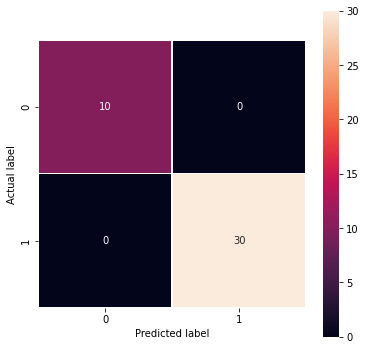

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
